## 1. Set up environment

In [ ]:
!pip install torch torchvision torchaudio transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## 2. Load Datasets

In [ ]:
# Define image transformations for preprocessing
IMAGE_SIZE = 224
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the dataset from the directory
DATASET_DIR = "/content/dataset"
dataset = datasets.ImageFolder(os.path.join(DATASET_DIR, "images"), transform=transform)

# Split dataset into 80% train and 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create data loaders for training and testing
BATCH_SIZE = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Print dataset summary
class_names = dataset.classes
print(f"Number of classes: {len(class_names)}")
print(f"Train set size: {len(train_dataset)}, Test set size: {len(test_dataset)}")


Number of classes: 200
Train set size: 9436, Test set size: 2360


In [ ]:
import zipfile
import os

zip_path = '/content/dataset.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Extracted Files:", os.listdir('/content/dataset/'))


Extracted Files: ['classes.txt', 'images', 'parts', 'attributes', 'image_class_labels.txt', 'bounding_boxes.txt', 'train_test_split.txt', 'README', 'images.txt']


In [ ]:
print("Class folders:", os.listdir('/content/dataset/images')[:5])

Class folders: ['182.Yellow_Warbler', '001.Black_footed_Albatross', '003.Sooty_Albatross', '054.Blue_Grosbeak', '044.Frigatebird']


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

cub_dataset = datasets.ImageFolder(root='/content/dataset/images', transform=transform)

cub_loader = DataLoader(cub_dataset, batch_size=32, shuffle=True)

print(f"Total Images: {len(cub_dataset)}")
print(f"Number of Classes: {len(cub_dataset.classes)}")
print(f"Example Classes: {cub_dataset.classes[:5]}")


Total Images: 11796
Number of Classes: 200
Example Classes: ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet']


### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
import os
from torchvision.datasets import ImageFolder

image_dir = '/content/dataset/images'

cub_dataset = ImageFolder(root=image_dir)

image_paths = [img[0] for img in cub_dataset.imgs]
image_labels = [img[1] for img in cub_dataset.imgs]

# Split data into train (20%) and test (80%)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, image_labels, test_size=0.8, stratify=image_labels, random_state=42
)

print(f"Train set size: {len(train_paths)} images")
print(f"Test set size: {len(test_paths)} images")


Train set size: 2359 images
Test set size: 9437 images


Custom Datasets

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

class CustomDataset(Dataset):
    def __init__(self, image_paths, image_labels, transform=None):
        self.image_paths = image_paths
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.image_labels[idx]
        image = Image.open(image_path).convert('RGB')  # Open image in RGB mode
        if self.transform:
            image = self.transform(image)
        return image, label

train_dataset = CustomDataset(train_paths, train_labels, transform=transform)
test_dataset = CustomDataset(test_paths, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train set size: {len(train_loader)} batches")
print(f"Test set size: {len(test_loader)} batches")


Train set size: 74 batches
Test set size: 295 batches


## 3. Experiment (baseline vs. other approaches)

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Step 1: Set up device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Step 3: Function to get text embeddings
def get_text_embeddings(prompts):
    inputs = processor(text=prompts, return_tensors="pt", padding=True).to(DEVICE)
    with torch.no_grad():
        text_embeddings = model.get_text_features(**inputs)
    return text_embeddings

# Example usage
prompts = ["A photo of a cat.", "A photo of a dog.", "A photo of a bird."]
text_embeddings = get_text_embeddings(prompts)
print("Text embeddings shape:", text_embeddings.shape)


Text embeddings shape: torch.Size([3, 512])


In [ ]:
def generate_prompts(class_names, template_type="simple"):
    if template_type == "simple":
        return [f"A photo of a {class_name}." for class_name in class_names]
    elif template_type == "descriptive":
        return [f"A large bird with colorful plumage called {class_name}." for class_name in class_names]
    elif template_type == "context":
        return [f"A {class_name} bird commonly found in tropical forests." for class_name in class_names]
    else:
        raise ValueError("Unknown template type.")

# Generate text embeddings for each strategy
def get_text_embeddings(prompts):
    inputs = processor(text=prompts, return_tensors="pt", padding=True).to(DEVICE)
    with torch.no_grad():
        text_embeddings = model.get_text_features(**inputs)
    return text_embeddings

# Generate text embeddings for simple, descriptive, and context-aware prompts
prompt_types = ["simple", "descriptive", "context"]
text_embeddings_dict = {ptype: get_text_embeddings(generate_prompts(class_names, ptype)) for ptype in prompt_types}


### Classification using cosine similarity

In [ ]:
from sklearn.metrics import accuracy_score

def classify_images(loader, text_embeddings, prompt_type):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            image_embeddings = model.get_image_features(images)
            image_embeddings = image_embeddings / image_embeddings.norm(dim=-1, keepdim=True)
            text_embeddings = text_embeddings / text_embeddings.norm(dim=-1, keepdim=True)
            similarities = torch.matmul(image_embeddings, text_embeddings.T)
            preds = torch.argmax(similarities, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    print(f"Accuracy with {prompt_type} prompts: {acc * 100:.2f}%")
    return all_preds, all_labels

results = {}
for ptype in prompt_types:
    print(f"Evaluating {ptype} prompts...")
    preds, labels = classify_images(test_loader, text_embeddings_dict[ptype], ptype)
    results[ptype] = {"preds": preds, "labels": labels}


Evaluating simple prompts...
Accuracy with simple prompts: 35.89%
Evaluating descriptive prompts...
Accuracy with descriptive prompts: 35.47%
Evaluating context prompts...
Accuracy with context prompts: 35.42%


## Confusion Matrix

Visualize misclassified images

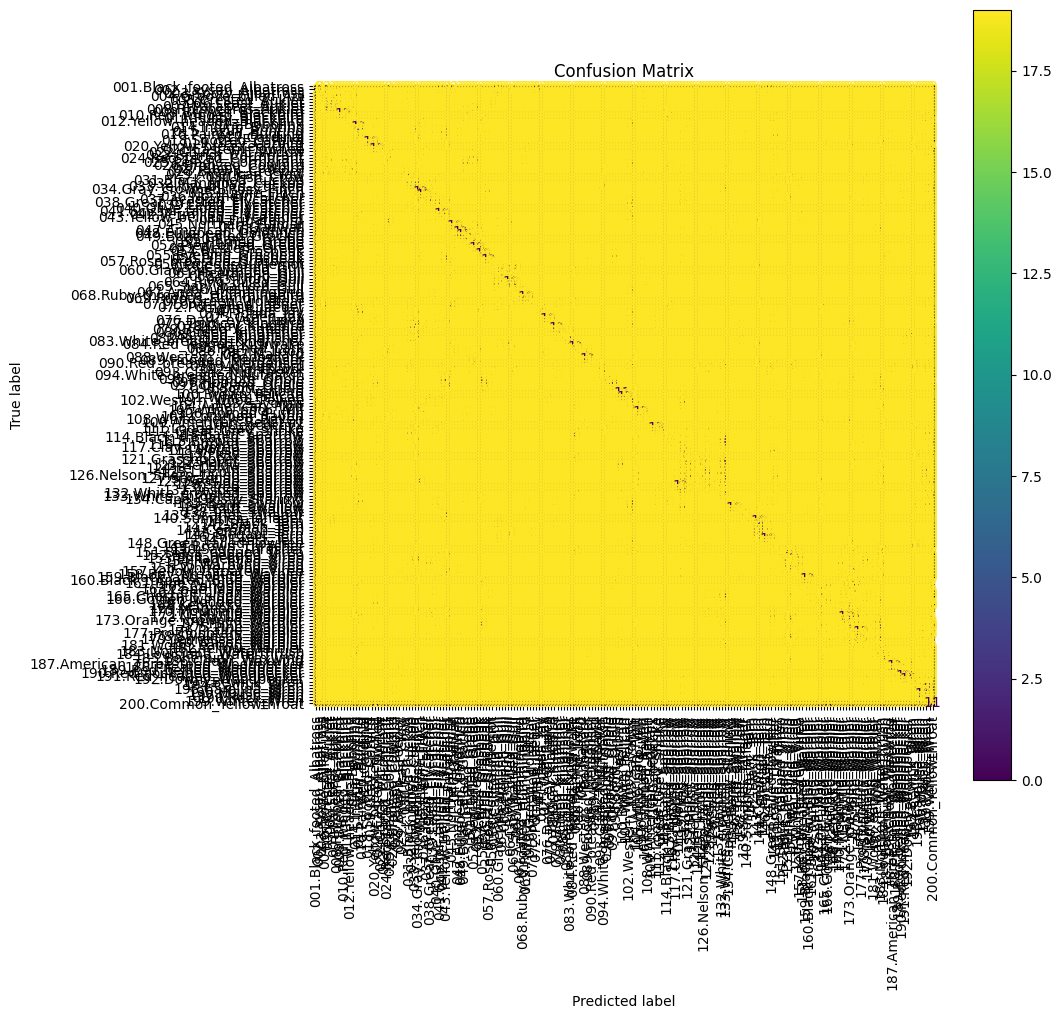

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(labels, preds, class_names):
    cm = confusion_matrix(labels, preds, labels=np.arange(len(class_names)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap="viridis", xticks_rotation="vertical")
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix for simple prompts
plot_confusion_matrix(results["simple"]["labels"], results["simple"]["preds"], class_names)


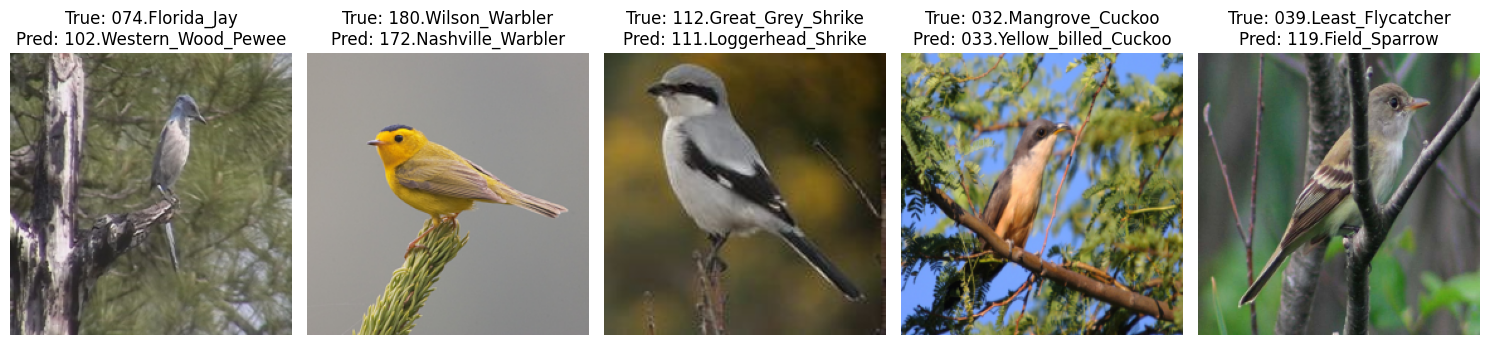

In [ ]:
def visualize_misclassifications(dataset, preds, labels):
    misclassified_indices = [i for i, (p, l) in enumerate(zip(preds, labels)) if p != l]
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i, idx in enumerate(misclassified_indices[:5]):
        image, label = dataset[idx]
        axs[i].imshow(image.permute(1, 2, 0) * 0.5 + 0.5)  # Unnormalize
        axs[i].axis("off")
        axs[i].set_title(f"True: {class_names[label]}\nPred: {class_names[preds[idx]]}")
    plt.tight_layout()
    plt.show()

# Visualize misclassifications for simple prompts
visualize_misclassifications(test_dataset, results["simple"]["preds"], results["simple"]["labels"])


## Other Approaches

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
import torch.nn.functional as F

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

prompt_templates = [
    "A photo of a {}.",
    "A close-up view of a {} bird.",
    "A detailed photo of a {} bird with colorful plumage.",
    "A {} bird commonly found in forest habitats."
]

prompt_accuracies = {}

for prompt_template in prompt_templates:
    # Generate prompts
    refined_prompts = [prompt_template.format(class_name.split('.')[1].replace('_', ' ')) for class_name in cub_dataset.classes]
    text_inputs = processor(text=refined_prompts, return_tensors="pt", padding=True)
    text_embeddings = model.get_text_features(**text_inputs).detach()

    predictions, ground_truths = [], []

    for images, labels in train_loader:
        image_inputs = processor(images=images, return_tensors="pt", padding=True, do_rescale=False)
        image_embeddings = model.get_image_features(**image_inputs).detach()


        image_embeddings = F.normalize(image_embeddings, p=2, dim=1)
        text_embeddings = F.normalize(text_embeddings, p=2, dim=1)

        # Calculate cosine similarity
        similarity_scores = torch.matmul(image_embeddings, text_embeddings.T)
        predicted_labels = torch.argmax(similarity_scores, dim=1)

        predictions.extend(predicted_labels.cpu().numpy())
        ground_truths.extend(labels.cpu().numpy())

    # Calculate accuracy for this prompt
    accuracy = accuracy_score(ground_truths, predictions)
    prompt_accuracies[prompt_template] = accuracy
    print(f"Prompt: '{prompt_template}' Accuracy: {accuracy * 100:.2f}%")

best_prompt = max(prompt_accuracies, key=prompt_accuracies.get)
print(f"Best Prompt: {best_prompt}")


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Prompt: 'A photo of a {}.' Accuracy: 49.72%
Prompt: 'A close-up view of a {} bird.' Accuracy: 47.86%
Prompt: 'A detailed photo of a {} bird with colorful plumage.' Accuracy: 47.69%
Prompt: 'A {} bird commonly found in forest habitats.' Accuracy: 48.96%
Best Prompt: A photo of a {}.


### tsne

In [ ]:
def plot_tsne_embeddings(image_embeddings, labels, class_names):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_embeddings = tsne.fit_transform(image_embeddings)
    plt.figure(figsize=(10, 10))
    for class_idx in np.unique(labels):
        idxs = np.where(labels == class_idx)
        plt.scatter(reduced_embeddings[idxs, 0], reduced_embeddings[idxs, 1], label=class_names[class_idx], alpha=0.7)
    plt.legend(loc="best", fontsize="small")
    plt.title("t-SNE Visualization of Embeddings")
    plt.show()

image_embeddings = np.vstack([model.get_image_features(images.to(DEVICE)).cpu().numpy() for images, _ in test_loader])
labels = np.hstack([labels.numpy() for _, labels in test_loader])
plot_tsne_embeddings(image_embeddings, labels, class_names)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.